Preprocess BursSR dataset for RAMS

In [24]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%pip install opencv-python
%pip install torchvision
%pip install exifread

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [25]:
# import utils and basic libraries
# from RAMS.utils.preprocessing import load_dataset,select_T_images,register_dataset,augment_dataset

from burst_preprocess_utils import load_dataset
import numpy as np
import os
import matplotlib.pyplot as plt

In [26]:
#-------------
# Settings
#-------------
T = 8                                # number of temporal dimension
n_augment = 7                        # number of temporal permutations to augment the dataset
dataset_dir = 'burstsr_dataset'          # input dir (train val and test splitted)
dataset_output_dir = 'burstsr_preprocessed'       # output dir
threshold_clean = 0.85               # percentage of clear pixel
train_full = False                   # train without a validation

<a id="loading"></a>
# 1.0 Dataset Loading

In [57]:
# train loading
X_train, X_train_masks, y_train, y_train_masks = load_dataset(base_dir=dataset_dir, 
                                                              part="train",
                                                              colored_image=False)
print(f"Train scenes: {len(X_train)} | Train y shape: {y_train.shape}")

  0%|          | 0/100 [00:00<?, ?it/s]

Train scenes: 100 | Train y shape: (100,)


In [58]:
# validation loading
X_val, X_val_masks, y_val, y_val_masks = load_dataset(base_dir=dataset_dir,
                                                      part="val",
                                                      colored_image=False)

print(f"Val RED scenes: {len(X_val)} | Val RED y shape: {y_val.shape}")

  0%|          | 0/100 [00:00<?, ?it/s]

Val RED scenes: 100 | Val RED y shape: (100,)


In [9]:
# test loading
#burst sr bevat geen test set
# X_RED_test, X_RED_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="RED")
# X_NIR_test, X_NIR_test_masks = load_dataset(base_dir=dataset_dir,part="test",band="NIR")

# print(f"Test RED scenes: {len(X_RED_test)}")
# print(f"Test NIR scenes: {len(X_NIR_test)}")

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

Test RED scenes: 146
Test NIR scenes: 144


<a id="visualize"></a>
# 3.0 Visualize the Pre-Processed Datataset

In [59]:
#-------------
# Settings
#-------------
index = 10
os.environ['KMP_DUPLICATE_LIB_OK']='True'

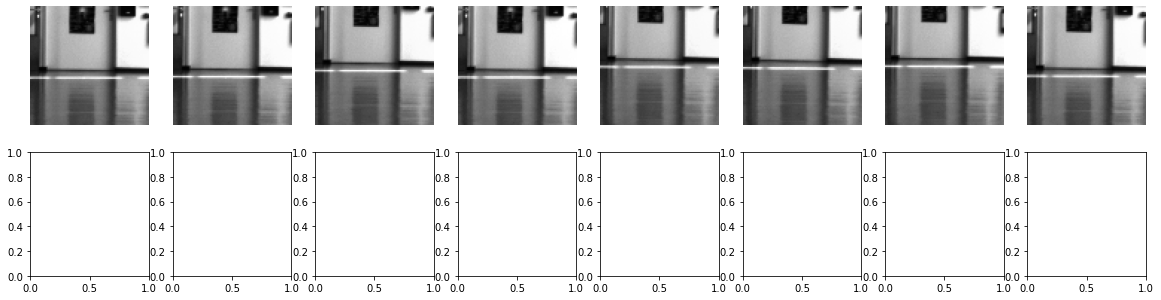

In [51]:
fig, ax = plt.subplots(2, T, figsize=(20,5))

for i in range(T):
    ax[0,i].imshow(X_train[index][...,i], cmap = 'gray')
    ax[0,i].axis('off')
plt.show()

<a id="save"></a>
# 4.0 Save dataset

In [60]:
if not os.path.isdir(dataset_output_dir):
    os.mkdir(dataset_output_dir)

In [61]:
# save training
np.save(os.path.join(dataset_output_dir, 'X_burst_train.npy'), X_train)

np.save(os.path.join(dataset_output_dir, 'y_burst_train.npy'), y_train)

np.save(os.path.join(dataset_output_dir, 'y_burst_train_masks.npy'), y_train_masks)

In [62]:
# save validation
if not train_full:
    np.save(os.path.join(dataset_output_dir, 'X_burst_val.npy'), X_val)

    np.save(os.path.join(dataset_output_dir, 'y_burst_val.npy'), y_val)

    np.save(os.path.join(dataset_output_dir, 'y_burst_val_masks.npy'), y_val_masks)

In [63]:
# save test
np.save(os.path.join(dataset_output_dir, 'X_burst_test.npy'), X_test)

NameError: name 'X_test' is not defined